<a href="https://colab.research.google.com/github/judex22/CIFAR10-Image-Classification-with-DeepLearning/blob/main/CIFAR10_Classifier_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#####      NOTE: Upload the my_utils python file by uncommenting '#' symbol below , ignore if already uploaded ######

#from google.colab import files
#files.upload()

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import my_utils as mu
from IPython import display
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader

import warnings
warnings.filterwarnings("ignore")

## 1. Read Dataset and Create Data loaders

In [ ]:
batch_size = 128


# Load the CIFAR-10 dataset and convert to Tensors
train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=ToTensor())
test = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=ToTensor())

# Create DataLoader
trainloader = DataLoader(train, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = DataLoader(test, batch_size=batch_size, shuffle=False, num_workers=2)

train,test

Files already downloaded and verified
Files already downloaded and verified


(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: ./data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
train[0]

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [ ]:
# Training data label list
classes= train.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

images.shape: torch.Size([128, 3, 32, 32])


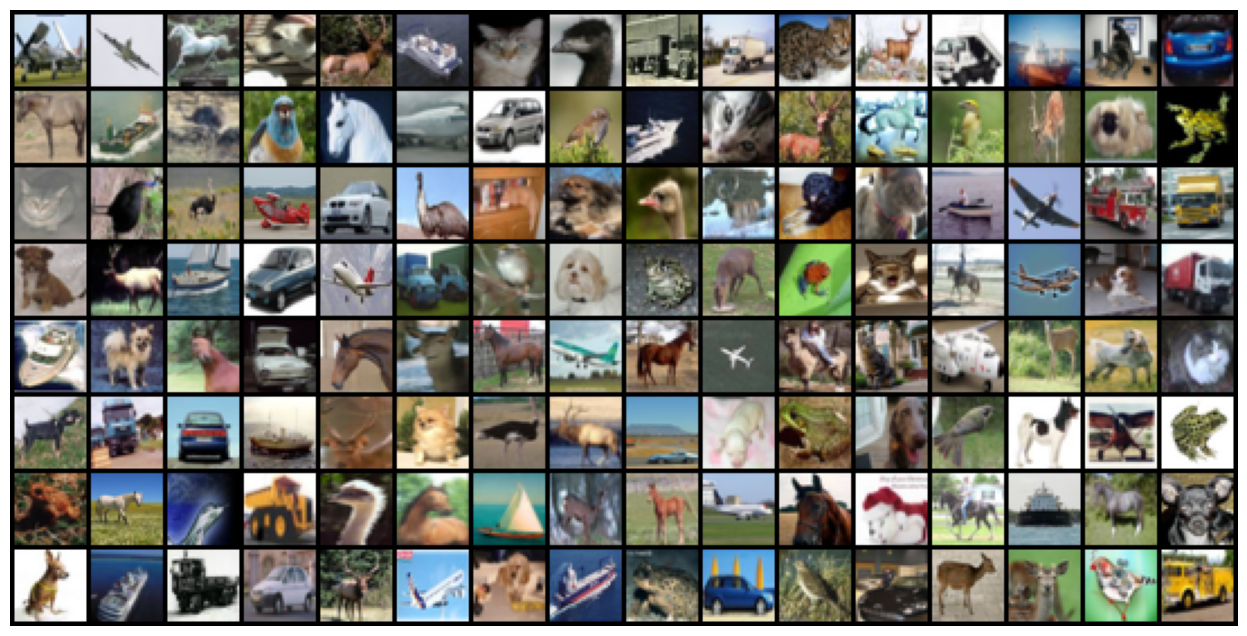

In [ ]:
# Display Batch Images
for images, _ in trainloader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

## 2. Create Model

In [ ]:
class ImageClassifier(nn.Module):
    def __init__(self, input_channels, output_size):
        super(ImageClassifier, self).__init__()
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))           # Spatial average pooling

        self.fc = nn.Linear(input_channels, 2)                #change output size to match K
        self.relu = nn.ReLU()                                 # ReLU activation
        self.flatten = nn.Flatten(1)
        self.conv1 = nn.Conv2d(3, 6, 5)                       # conv layer with inp size, 6 op channels, and kernel size of 5x5: op1= ((inp-kernel+2padd)/stride)+1=>(32-5+0/1)+1=> op1=28.0
        self.fc1 = nn.Linear(6 * 28 * 28, 10)                 # input of linear function is 28*28*6 of previous layer output of conv1 with 10 output channels corresponding to number of classes
        self.conv2 = nn.Conv2d(3, 6, 5)
        self.fc2 = nn.Linear(6 * 28 * 28, 10)

    def forward(self, x):
        mlp = self.avgpool(x)
        mlp = self.flatten(mlp)
        mlp = self.fc(mlp)                                    # tensor size: [128, 2]
        conv1 = self.relu(self.conv1(x))
        conv1 = conv1.view(-1, 6 * 28 * 28)
        conv1 = self.fc1(conv1)                               # tensor size: [128, 10]
        conv2 = self.relu(self.conv1(x))
        conv2 = conv2.view(-1, 6 * 28 * 28)
        conv2 = self.fc1(conv2)

        c1 = mlp[0, 0] * conv1                                # obtain block c1
        c2 = mlp[0, 1] * conv2                                # obtain block c2

        out = c1+c2
        return out

## 3. Define Loss and Optimizer

In [ ]:
model = ImageClassifier(input_channels=3, output_size=10)

loss = nn.CrossEntropyLoss()

lr, mom, wd= 0.01, 0.9, 0.0005

optimizer = optim.SGD(model.parameters(), lr=lr, momentum=mom, weight_decay=wd)

In [ ]:
model2 = ImageClassifier(input_channels=3, output_size=10)

loss = nn.CrossEntropyLoss()
lr2, mom2,wd2= 0.0001, 0.9, 0.0005

optimizer2 = optim.SGD(model2.parameters(), lr=lr2, momentum=mom2, weight_decay=wd2)

In [ ]:
model3 = ImageClassifier(input_channels=3, output_size=10)

loss = nn.CrossEntropyLoss()

lr3, mom3,wd3= 0.005, 0.9, 0.0005

optimizer3 = optim.SGD(model3.parameters(), lr=lr3, momentum=mom3,weight_decay=wd3)


## 4. Train the model

In [ ]:
def train_epoch_ch3(net, train_iter, loss, updater):
    """The training loop defined in Chapter 3."""
    # Set the model to training mode
    if isinstance(net, torch.nn.Module):
        net.train()
    # Sum of training loss, sum of training accuracy, no. of examples
    metric = mu.Accumulator(3)
    for X, y in train_iter:
        # Compute gradients and update parameters
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(float(l) * len(y), mu.accuracy(y_hat, y), y.size().numel())
        else:
            l.sum().backward()
            updater(X.shape[0])
            metric.add(float(l.sum()), mu.accuracy(y_hat, y), y.numel())
    # Return training loss and training accuracy
    return metric[0] / metric[2], metric[1] / metric[2]

In [ ]:
class Animator:
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(5.5, 4.5)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        mu.use_svg_display()
        self.fig, self.axes = mu.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: mu.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [ ]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, optimizer):
    """Train a model."""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.1, 2.3],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, optimizer)
        print(train_metrics[0])
        test_acc = mu.evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics



In [ ]:
def accuracy(y_hat, y):  #y_hat is a matrix; 2nd dimension stores prediction scores for each class.
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1) # Predicted class is the index of max score
    cmp = (y_hat.type(y.dtype) == y)  # because`==` is sensitive to data types
    return float(torch.sum(cmp)) # Taking the sum yields the number of correct predictions.

In [ ]:
def evaluate_accuracy(net, data_iter):
    """Compute the accuracy for a model on a dataset."""
    metric = Accumulator(2)  # No. of correct predictions, no. of predictions
    for _, (X, y) in enumerate(data_iter):
        metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [ ]:
class Accumulator:
    """For accumulating sums over `n` variables."""
    def __init__(self, n):
        self.data = [0.0] * n # [0, 0, ..., 0]
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
    def reset(self):
        self.data = [0.0] * len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]

# Model Evaluation


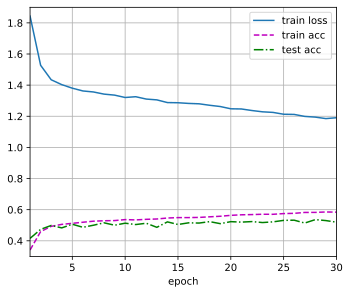

In [ ]:
num_epochs = 30                                                                 #lr=0.01, mom, wd= 0.01, 0.9, 0.0005
train_ch3(model, trainloader, testloader, loss, num_epochs, optimizer)

In [ ]:
mu.evaluate_accuracy(model, testloader)

0.5197

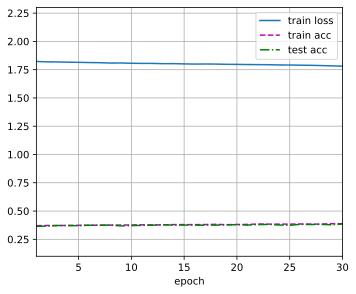

In [ ]:
num_epochs = 30                                                                 #lr=0.0001, mom, wd= 0.0001, 0.9, 0.0005
train_ch3(model2, trainloader, testloader, loss, num_epochs, optimizer2)

In [ ]:
mu.evaluate_accuracy(model2, testloader)

0.3857

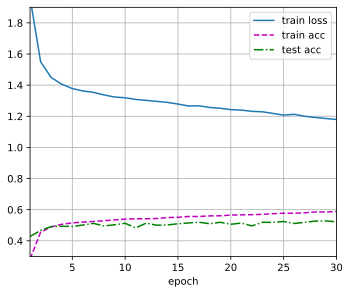

In [ ]:
num_epochs = 30                                                                 #lr=0.005, mom, wd= 0.005, 0.9, 0.0005
train_ch3(model3, trainloader, testloader, loss, num_epochs, optimizer3)

In [ ]:
mu.evaluate_accuracy(model3, testloader)

0.5224